In [1]:
import pandas as pd
d = pd.read_csv('dataset/student-por.csv',sep=';')
len(d)

649

In [2]:
d['pass']=d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0,axis=1)
d = d.drop(['G1','G2','G3'],axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [3]:
d = pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
                              'famsup','paid','activities','nursery','higher','internet','romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
d = d.sample(frac=1)
d_train=d[:500]
d_test=d[500:]

In [5]:
d_train_att = d_train.drop(['pass'],axis=1)
d_train_pass = d_train['pass']

In [6]:
d_test_att = d_test.drop(['pass'],axis=1)
d_test_pass = d_test['pass']

In [7]:
d_att = d.drop(['pass'],axis=1)
d_pass = d['pass']

In [8]:
import numpy as np

In [9]:
print('Passing %d out of %d (%.2f%%)'%(np.sum(d_pass),len(d_pass),100*float(np.sum(d_pass))/len(d_pass)))

Passing 328 out of 649 (50.54%)


In [10]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
t = t.fit(d_train_att,d_train_pass)

In [16]:
import graphviz

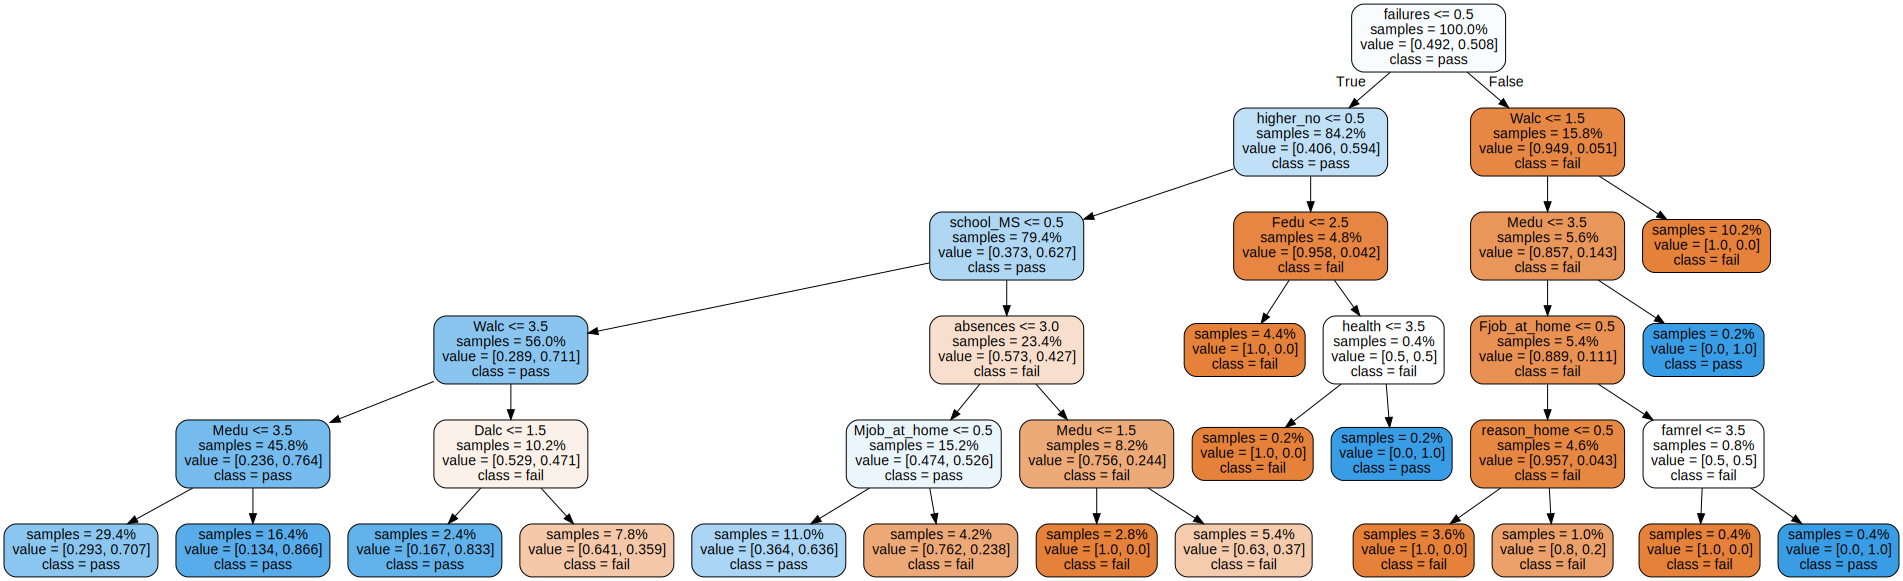

In [22]:
dot_data = tree.export_graphviz(t,out_file=None,label='all',impurity=False,proportion=True,feature_names=list(d_train_att),
                               class_names=['fail','pass'],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [36]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

In [37]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [38]:
dot_data2 = io.StringIO()

In [39]:
export_graphviz(t,out_file = dot_data2,rounded=True,filled=True)

In [12]:
tree.export_graphviz(t, out_file = 'student-perfromance.dot',label='all',impurity=False,proportion=True,
                    feature_names=list(d_train_att), class_names=['fail','pass'],filled=True,rounded=True)

In [13]:
t.score(d_test_att,d_test_pass)

0.6577181208053692

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t,d_att,d_pass,cv=5)
print('Accuracy: %0.2f (+/- %0.2f)'%(scores.mean(),scores.std()*2))

Accuracy: 0.69 (+/- 0.07)


In [41]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    print('Max depth: %d, Accuracy: %0.2f (+/- %0.2f)'%(max_depth,scores.mean(),scores.std()*2))

Max depth: 1, Accuracy: 0.64 (+/- 0.06)
Max depth: 2, Accuracy: 0.69 (+/- 0.05)
Max depth: 3, Accuracy: 0.68 (+/- 0.07)
Max depth: 4, Accuracy: 0.69 (+/- 0.08)
Max depth: 5, Accuracy: 0.69 (+/- 0.09)
Max depth: 6, Accuracy: 0.66 (+/- 0.07)
Max depth: 7, Accuracy: 0.67 (+/- 0.08)
Max depth: 8, Accuracy: 0.67 (+/- 0.10)
Max depth: 9, Accuracy: 0.65 (+/- 0.05)
Max depth: 10, Accuracy: 0.65 (+/- 0.10)
Max depth: 11, Accuracy: 0.64 (+/- 0.08)
Max depth: 12, Accuracy: 0.63 (+/- 0.09)
Max depth: 13, Accuracy: 0.65 (+/- 0.12)
Max depth: 14, Accuracy: 0.64 (+/- 0.06)
Max depth: 15, Accuracy: 0.63 (+/- 0.09)
Max depth: 16, Accuracy: 0.65 (+/- 0.08)
Max depth: 17, Accuracy: 0.65 (+/- 0.08)
Max depth: 18, Accuracy: 0.64 (+/- 0.10)
Max depth: 19, Accuracy: 0.64 (+/- 0.09)


In [42]:
depth_acc = np.empty((19,3),float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std()*2
    i+=1
depth_acc

array([[ 1.        ,  0.63782946,  0.05800032],
       [ 2.        ,  0.6856291 ,  0.04819881],
       [ 3.        ,  0.68249255,  0.06770664],
       [ 4.        ,  0.69179487,  0.0778677 ],
       [ 5.        ,  0.69329756,  0.07763469],
       [ 6.        ,  0.67169946,  0.07598408],
       [ 7.        ,  0.66394753,  0.10020491],
       [ 8.        ,  0.66863447,  0.0863587 ],
       [ 9.        ,  0.647096  ,  0.05680903],
       [10.        ,  0.64249255,  0.08898923],
       [11.        ,  0.65017293,  0.07113154],
       [12.        ,  0.63623137,  0.12127007],
       [13.        ,  0.63008945,  0.10207543],
       [14.        ,  0.63317829,  0.09399579],
       [15.        ,  0.63779368,  0.10342415],
       [16.        ,  0.64859869,  0.07887243],
       [17.        ,  0.62855098,  0.08990013],
       [18.        ,  0.63166369,  0.07414391],
       [19.        ,  0.63007752,  0.09806506]])

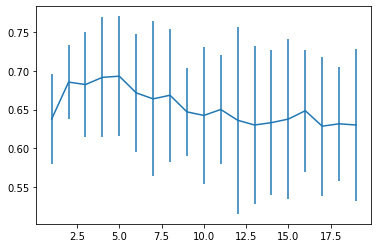

In [43]:
fig,ax = plt.subplots()
ax.errorbar(depth_acc[:,0],depth_acc[:,1],yerr=depth_acc[:,2])
plt.show()